# Assignment 11 

# Topic : Text_Mining

__Q 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data = pd.read_csv("Elon_musk.csv",encoding = "Latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data.drop(columns = "Unnamed: 0",inplace = True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Preprocessing

__Step 1 : Normalization__

In [7]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data = [Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [8]:
tweets =' '.join(data)
tweets[0:100]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [9]:
# removal of characters like x92
clean_text_0 = tweets.encode("ascii", "ignore").decode()
clean_text_0[0:1000]

'@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F92

In [10]:
# Removal of unicode
clean_text_1 = re.sub(r'<[^\s]+','',clean_text_0)
clean_text_1[0:1000]

'@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy  This is true power ha

In [11]:
#Removal of twitter handles
clean_text_2 = re.sub(r'@[^\s]+','',clean_text_1)
clean_text_2[0:1000]

' Im an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM    Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with  https://t.co/3rWE9uHSTS   Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha https://t.co/Fc9uhQSd7O  Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of th

In [12]:
#Removal of url
clean_text_3 = re.sub(r'http\S+', '', clean_text_2)
clean_text_3[0:1000]

' Im an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes    Once we can predict cash flow reasonably w

In [13]:
# Removal of Punctuation
clean_text_4 = clean_text_3.translate(str.maketrans('','',string.punctuation))
clean_text_4[0:1000]

' Im an alien  Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it   Great interview  Doge is underestimated  Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all     Haha thanks    Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler  He definitely has issues but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes    Once we can predict cash flow reasonably well Starlink will I

In [14]:
#Changing all words to lower case
clean_text_5 = str.lower(clean_text_4)
clean_text_5[0:1000]

' im an alien  ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all     haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with     its getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account   this is true power haha   any crypto wallet that wont give you your private keys should be avoided at all costs  your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission   yes    once we can predict cash flow reasonably well starlink will i

__Step 2: Tokenization__

In [15]:
token = TweetTokenizer(strip_handles = True) #Stip_handles = True removes @
tweet_token = token.tokenize(clean_text_5)
print(tweet_token[0:10])

['im', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is']


In [16]:
len(tweet_token)

16984

__Step 3 : Stop word removal__

In [17]:
sw = stopwords.words('english')
new_words = ['rt','ye','yeah','haha','yes','i','the','amp']
sw.extend(new_words)
no_sw = [word for word in tweet_token if not word in sw]
no_sw[0:10]

['im',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried',
 'great',
 'interview']

__Step 4 : Lemmatization__

In [18]:
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(no_sw))
print(doc[0:100])

im alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power crypto wallet wont give private keys avoided costs app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'm', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year']


In [20]:
clean_data = ' '.join(lemmas)
clean_data[0:1000]

'I m alien ray trace cyberpunk hdr nextlevel try great interview doge underestimate congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge think would fail thank indeed tweet definitely represent realworld time allocation entertaining outcome likely send agree clubhouse get real buy dogecoin lil x toddler hodler definitely issue sentencing seem bit high thank fix please unlock account true power crypto wallet will not give private key avoid cost app suck nasa select falcon heavy launch first two element lunar gateway together one mission predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g mean price country difference taxis ship intend earth may idea apply mars xprize team manage 100 m carbon capture prize everyone tesla receive stock comp stockoption t

### Feature extraction

__Count Vectorization__

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'alien': 198, 'ray': 2329, 'trace': 2982, 'cyberpunk': 764, 'hdr': 1351, 'nextlevel': 1946, 'try': 3014, 'great': 1300, 'interview': 1545, 'doge': 888, 'underestimate': 3054, 'congratulation': 671, 'tesla': 2897, 'china': 580, 'amazing': 220, 'execution': 1052, 'last': 1627, 'year': 3267, 'next': 1945, 'even': 1025, 'happy': 1335, 'new': 1943, 'ox': 2065, 'frodo': 1203, 'underdoge': 3053, 'think': 2921, 'would': 3255, 'fail': 1087, 'thank': 2907, 'indeed': 1487, 'tweet': 3029, 'definitely': 801, 'represent': 2397, 'realworld': 2344, 'time': 2942, 'allocation': 202, 'entertaining': 997, 'outcome': 2045, 'likely': 1681, 'send': 2535, 'agree': 182, 'clubhouse': 609, 'get': 1260, 'real': 2339, 'buy': 499, 'dogecoin': 890, 'lil': 1682, 'toddler': 2956, 'hodler': 1398, 'issue': 1563, 'sentencing': 2540, 'seem': 2527, 'bit': 417, 'high': 1384, 'fix': 1149, 'please': 2159, 'unlock': 3078, 'account': 141, 'true': 3008, 'power': 2194, 'crypto': 746, 'wallet': 3165, 'will': 3224, 'not': 1966, 'g

In [23]:
print(cv.get_feature_names()[150:200])

['across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aiautopilot', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align']


In [24]:
print(x.toarray()[150:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(x.toarray().shape)

(10349, 3285)


__Count Vectorizer with N grams__

In [26]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print("\n")
print(bow_matrix_ngram.toarray())

['absolutely', 'actually', 'also', 'back', 'beta', 'big', 'booster', 'can', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'engineering', 'even', 'ever', 'exactly', 'falcon', 'feel', 'fire', 'first', 'flight', 'fsd', 'future', 'game', 'get', 'go', 'good', 'great', 'hard', 'high', 'land', 'launch', 'life', 'like', 'long', 'look', 'lot', 'love', 'make', 'many', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'product', 'production', 're', 'right', 'rocket', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'team', 'tesla', 'test', 'thank', 'that', 'thing', 'think', 'time', 'true', 'try', 'use', 'version', 'way', 'we', 'week', 'well', 'work', 'would', 'year']


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


__TF - IDF vectorizer__

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=200)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [29]:
print(tfidfv_ngram_max_features.get_feature_names())
print("\n")
print(tfidf_matrix_ngram.toarray())

['20', 'absolutely', 'accurate', 'actually', 'agree', 'ai', 'almost', 'also', 'although', 'amazing', 'appreciate', 'astronaut', 'back', 'bad', 'bar', 'berlin', 'beta', 'big', 'boca', 'body', 'booster', 'build', 'call', 'can', 'car', 'cargo', 'change', 'close', 'come', 'company', 'complete', 'confirm', 'cool', 'cost', 'could', 'crew', 'day', 'definitely', 'design', 'do', 'dragon', 'droneship', 'early', 'earth', 'easy', 'electric', 'engine', 'engineering', 'enough', 'even', 'ever', 'exactly', 'falcon', 'far', 'fast', 'feel', 'fire', 'first', 'flap', 'flight', 'fly', 'fsd', 'future', 'game', 'get', 'giga', 'give', 'go', 'good', 'great', 'happen', 'hard', 'hear', 'high', 'hope', 'hopefully', 'human', 'important', 'improve', 'improvement', 'increase', 'land', 'landing', 'last', 'launch', 'leg', 'less', 'life', 'like', 'likely', 'little', 'long', 'look', 'lot', 'love', 'low', 'make', 'many', 'mar', 'mass', 'matter', 'maybe', 'mean', 'might', 'mission', 'model', 'money', 'month', 'move', 'muc

### Wordcloud

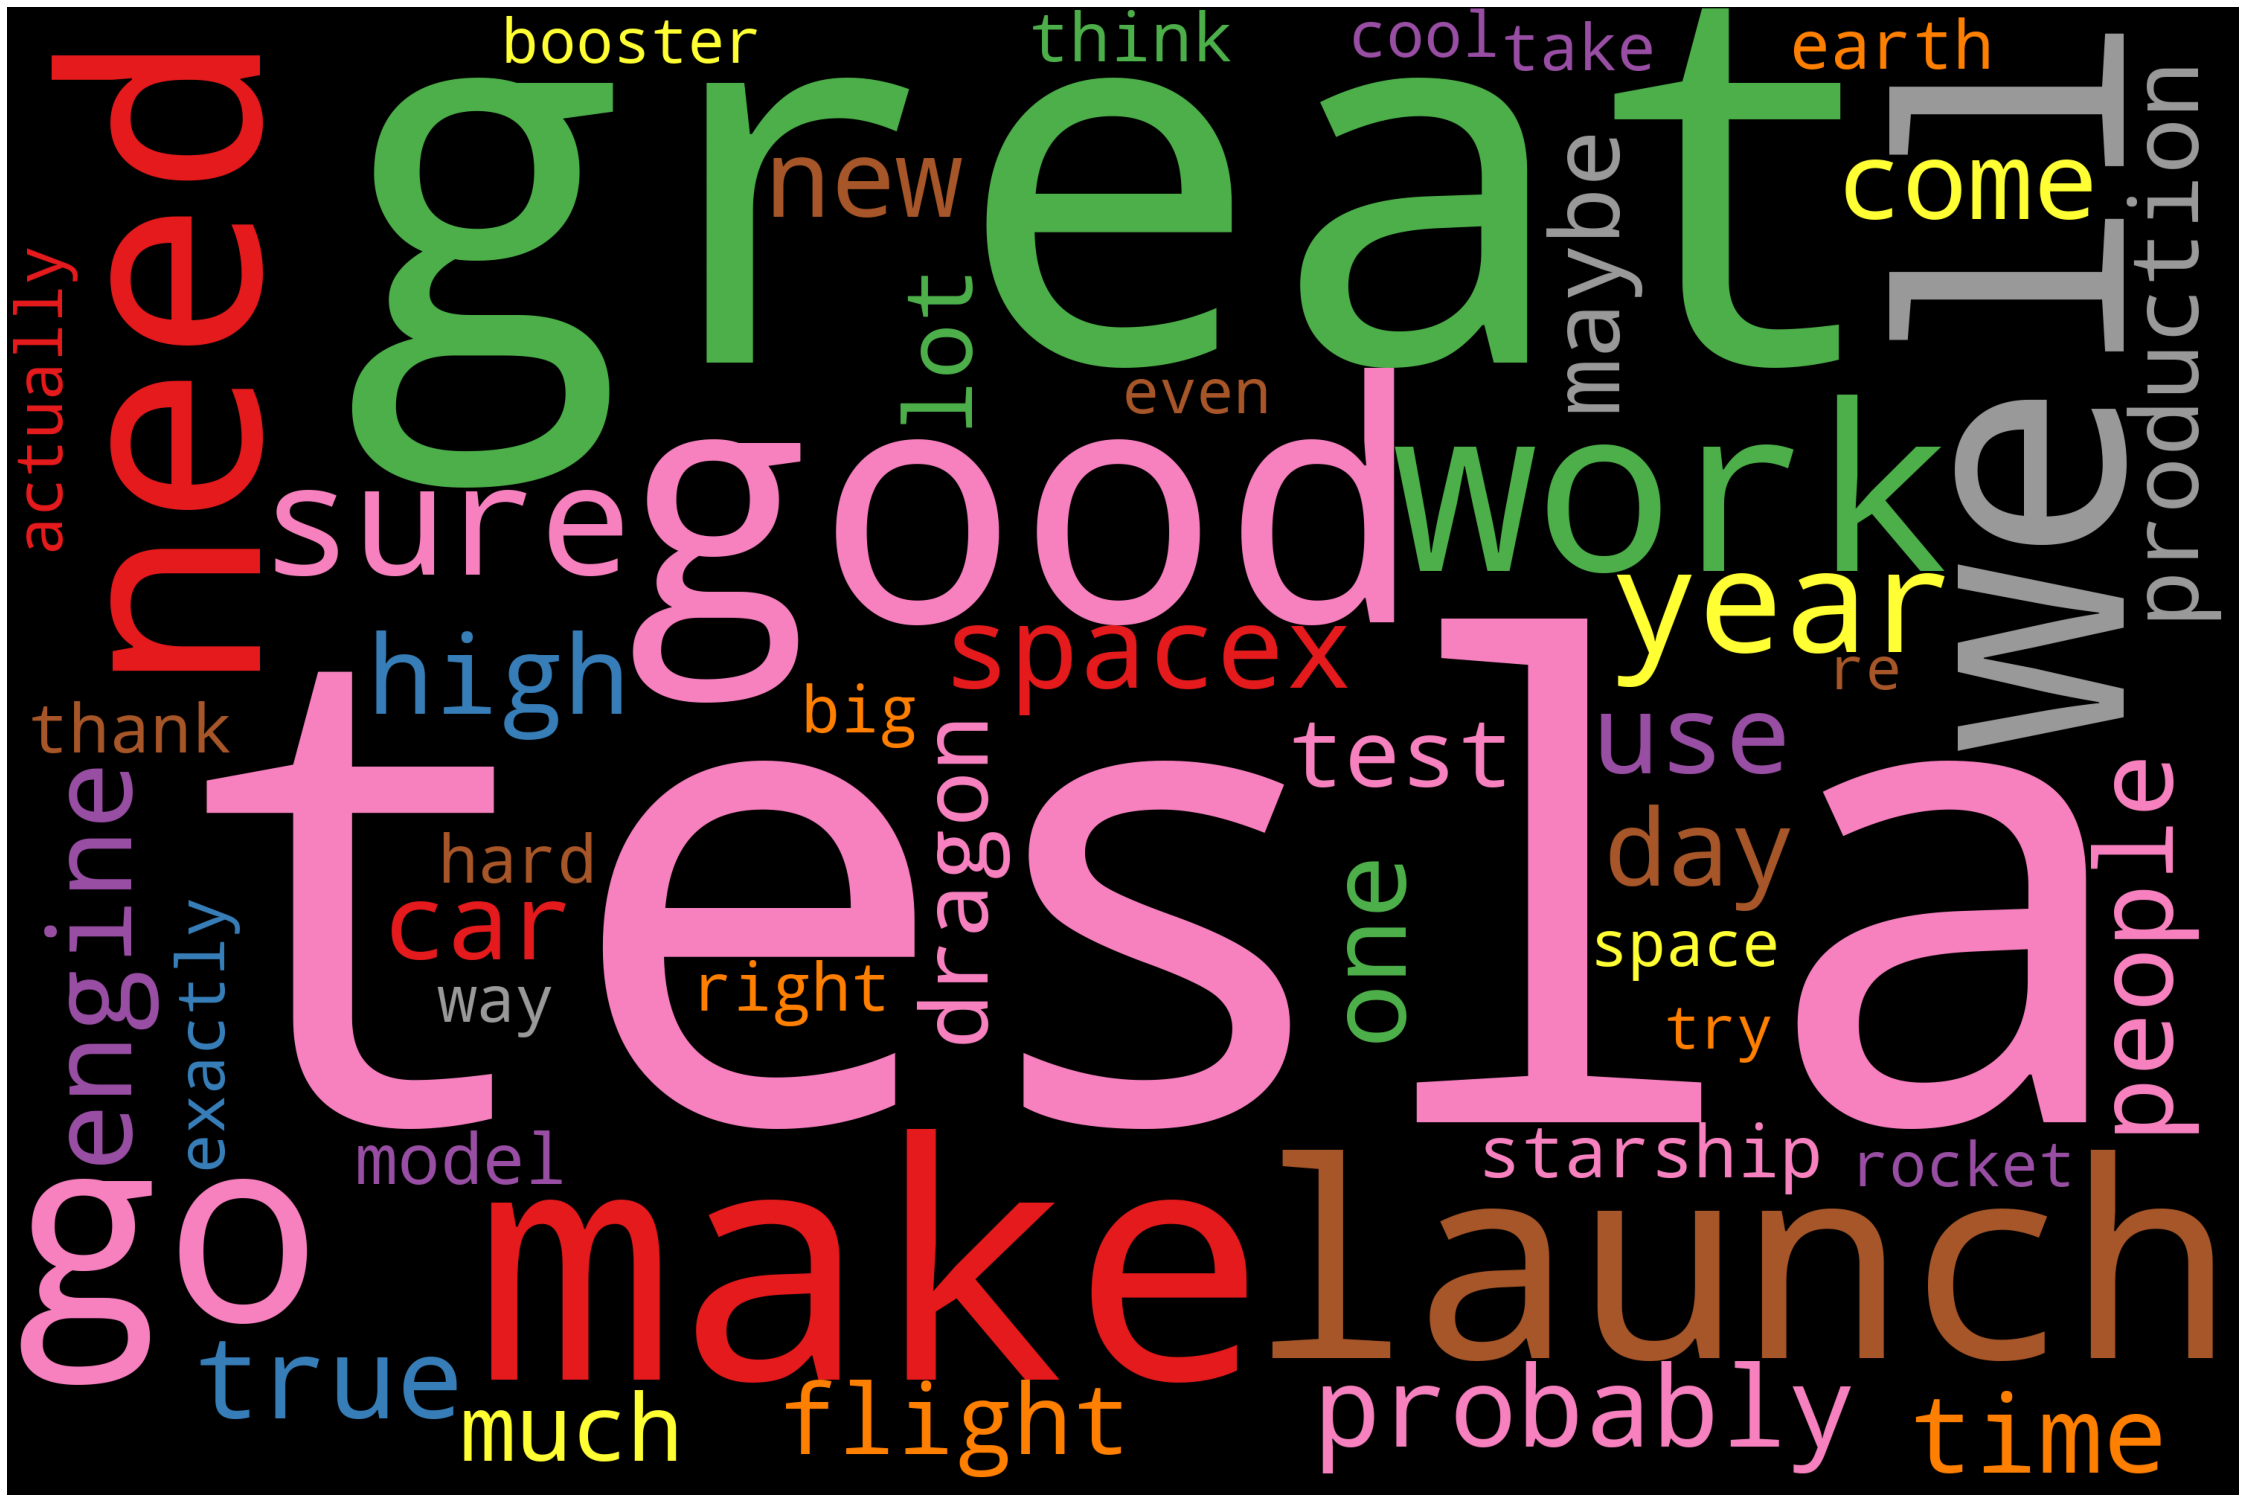

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('m')
STOPWORDS.add('s')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_data)
plot_cloud(wordcloud)

### Named Entity Recognition

In [31]:
nlp=spacy.load('en_core_web_md')

one_block=clean_data
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block:
    print(token,token.pos_) 

I PRON
m VERB
alien PROPN
ray NOUN
trace NOUN
cyberpunk ADJ
hdr NOUN
nextlevel NOUN
try VERB
great ADJ
interview NOUN
doge PROPN
underestimate ADJ
congratulation NOUN
tesla PROPN
china PROPN
amazing PROPN
execution NOUN
last ADJ
year NOUN
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox PROPN
frodo PROPN
underdoge PROPN
think VERB
would AUX
fail VERB
thank VERB
indeed ADV
tweet NOUN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
entertaining ADJ
outcome NOUN
likely ADV
send VERB
agree NOUN
clubhouse NOUN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler NOUN
hodler NOUN
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit NOUN
high ADJ
thank VERB
fix VERB
please INTJ
unlock NOUN
account NOUN
true ADJ
power NOUN
crypto NOUN
wallet NOUN
will AUX
not PART
give VERB
private ADJ
key ADJ
avoid NOUN
cost NOUN
app PROPN
suck PROPN
nasa PROPN
select VERB
falcon PROPN
heavy ADJ
launch NOUN
first ADV
two NUM
element NOUN
lunar ADJ
gateway NOUN
together 

cheese NOUN
make VERB
cake NOUN
do AUX
not PART
love VERB
we PRON
deep ADJ
trouble NOUN
everything PRON
make VERB
cake NOUN
true ADJ
weird ADJ
game NOUN
think VERB
cgi PROPN
need VERB
ui PROPN
overhaul PROPN
incremental ADJ
improvement NOUN
production NOUN
codebase NOUN
fsd NOUN
build PROPN
starlink NOUN
pose VERB
hazard NOUN
viasat NOUN
profit NOUN
like AUX
stop VERB
sneaky PROPN
move VERB
charlie PROPN
ergen PROPN
entertainment PROPN
critical ADJ
car NOUN
drive NOUN
meet VERB
larry PROPN
ellison PROPN
seek VERB
advice NOUN
back ADP
work NOUN
tesla NOUN
end VERB
quarter NOUN
tomorrow NOUN
absolutely ADV
tesla ADJ
incar PROPN
game PROPN
autonomous ADJ
world NOUN
absolutely ADV
taste VERB
future NOUN
try AUX
play VERB
polytopia NOUN
tesla PROPN
great PROPN
game PROPN
multiplayer PROPN
online NOUN
version NOUN
come VERB
soon ADV
focus VERB
make VERB
product NOUN
service NOUN
people NOUN
truly ADV
love VERB
total ADJ
economic ADJ
pie NOUN
big ADJ
instead ADV
en ADP
roughly ADV
95 NUM
part

gene NOUN
unique PROPN
cov NOUN
what PRON
s AUX
honey NOUN
feel VERB
way NOUN
seem VERB
accurate ADJ
cold ADJ
symptom PROPN
go PROPN
degree NOUN
po PROPN
heneghan PROPN
make VERB
lot NOUN
sense NOUN
hilarious ADJ
clarify NOUN
r NOUN
number NOUN
pcr ADJ
amplification NOUN
cycle NOUN
require VERB
detect ADJ
virus NOUN
rough ADJ
indicator NOUN
vir PROPN
great ADJ
reference NOUN
worth ADJ
read NOUN
case NOUN
close ADJ
soon ADV
fwiw ADJ
lab NOUN
speak NOUN
think VERB
30 NUM
accurate ADJ
30 NUM
40 NUM
gets AUX
dicey VERB
40 NUM
bs INTJ
talk NOUN
lab NOUN
speak NOUN
say VERB
cov PROPN
2 NUM
pcr ADJ
detection NOUN
n1 PROPN
n3 PROPN
gene VERB
30 NUM
cycle NOUN
reliable ADJ
40 NUM
cycle NOUN
note NOUN
spike NOUN
protein NOUN
do AUX
not PART
consider VERB
reliable ADJ
speak VERB
directly ADV
test VERB
lab NOUN
main ADJ
pcr ADJ
search NOUN
n1 PROPN
gene NOUN
unique ADJ
strange ADJ
possible ADJ
explanation NOUN
dramatic ADJ
decline NOUN
cold ADJ
flu NOUN
prevalence NOUN
vs ADP
prior ADJ
year NOUN
s

bolt NOUN
part NOUN
collision NOUN
repair NOUN
sandy ADJ
munro PROPN
understand VERB
engineering NOUN
would AUX
like VERB
license VERB
battlestar NOUN
galactica PROPN
actually ADV
buil VERB
gigafactory NOUN
hard ADJ
critical ADJ
product NOUN
battery NOUN
pack NOUN
bond NOUN
structure NOUN
cell NOUN
provide VERB
shear NOUN
transfer NOUN
b PROPN
understand PROPN
production NOUN
much ADV
well ADV
primary ADJ
competitive ADJ
advantage NOUN
longterm VERB
even ADV
gm PROPN
chrysler PROPN
go VERB
bankrupt ADJ
2009 NUM
ford PROPN
tesla PROPN
us PROPN
car NOUN
company NOUN
model VERB
3 NUM
production NOUN
ramp NOUN
sheer ADJ
agony NOUN
two NUM
year NOUN
die VERB
te AUX
bring VERB
new ADJ
product NOUN
volume NOUN
production NOUN
1 NUM
inspiration NOUN
99 NUM
perspiration NOUN
st ADJ
marginal ADJ
cost NOUN
starship NOUN
mass NOUN
orbit NOUN
well INTJ
100 NUM
kg NOUN
fully ADV
burden NOUN
cost NOUN
depend VERB
flight NOUN
rate NOUN
prototype NOUN
piece NOUN
cake VERB
high ADJ
volume NOUN
productio

condition NOUN
test NOUN
initially ADV
try VERB
tesla ADJ
50 NUM
false ADJ
positive ADJ
include VERB
fro PROPN
yet ADV
people NOUN
read VERB
much ADJ
level NOUN
detail NOUN
useful ADJ
predict VERB
future ADJ
critical ADJ
feedback NOUN
always ADV
appreciate VERB
btw ADV
can AUX
not PART
blanket VERB
pass NOUN
maybe ADV
event NOUN
boost VERB
late ADJ
version NOUN
large ADJ
device NOUN
would AUX
potential VERB
yup INTJ
actually ADV
c X
although SCONJ
syntax NOUN
could AUX
improve VERB
esthetically ADV
like ADP
c PROPN
avoids PROPN
class NOUN
warfare NOUN
nightcap NOUN
would AUX
probably ADV
work VERB
well ADV
pretty ADV
much ADV
good ADJ
summary NOUN
conceptual ADJ
telepathy ADJ
ever ADV
fantasize VERB
1880s NUM
engineer NOUN
work PROPN
edison PROPN
lab NOUN
apply VERB
work NOUN
ahem PRON
start VERB
soon ADV
physics VERB
either CCONJ
impossible ADJ
trivial ADJ
impossible ADJ
understand AUX
become VERB
trivial ADJ
e PROPN
rutherford PROPN
giant PROPN
gap PROPN
experimental ADJ
medical ADJ


dig VERB
sum VERB
gt PROPN
part NOUN
add VERB
mile NOUN
range VERB
slow ADJ
traffic NOUN
government NOUN
money NOUN
far ADV
talk VERB
trillion NUM
one NUM
ever ADV
top ADJ
secret ADJ
fart NOUN
technology NOUN
sure ADJ
tesla ADJ
open ADJ
license NOUN
software NOUN
supply NOUN
powertrain NOUN
battery NOUN
try VERB
accelera NOUN
do AUX
not PART
appear VERB
appreciate VERB
government NOUN
monopolist PROPN
corporation NOUN
limit NOUN
agree VERB
prototype NOUN
color NOUN
think VERB
use VERB
like ADP
bernie PROPN
maybe ADV
he PRON
s AUX
feel VERB
bern ADJ
fuel NOUN
spin NOUN
valve NOUN
do AUX
not PART
open VERB
fix NOUN
try VERB
tomorrow NOUN
also ADV
odd ADJ
tvc PROPN
hydraulic PROPN
pump NOUN
behavior NOUN
launch NOUN
pad NOUN
connector NOUN
damage NOUN
storm NOUN
fix NOUN
might AUX
able VERB
whether SCONJ
commercial ADJ
government NOUN
monopoly NOUN
bad ADJ
people NOUN
sound VERB
great ADJ
das PROPN
kapital NOUN
nutshell INTJ
like INTJ
great ADJ
sense NOUN
humor NOUN
leave VERB
lose VERB
m

In [33]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[10:50])

['year', 'think', 'fail', 'thank', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'power', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'select', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow']


In [34]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 


,word,count
0,launch,64
1,make,63
2,year,48
3,work,46
4,go,46
5,need,46
6,come,40
7,get,37
8,day,37
9,engine,36


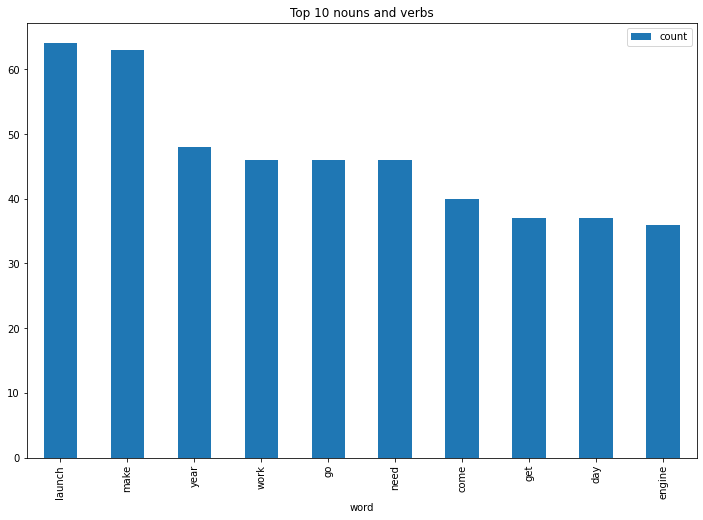

In [35]:
#Barchart for top 10 nouns + verbs
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion mining - sentimental analysis

In [36]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(''.join(tweets))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [37]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [38]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [39]:
affinity_scores=affin.set_index('word')['value'].to_dict()
#affinity_scores

In [40]:

nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [41]:
calculate_sentiment(text='nice')

3

In [42]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [43]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,14,72
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [45]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.380952
std        2.705459
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

__Negative and neutral tweets__

In [46]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


__Positive tweets__

In [47]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",2,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [48]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


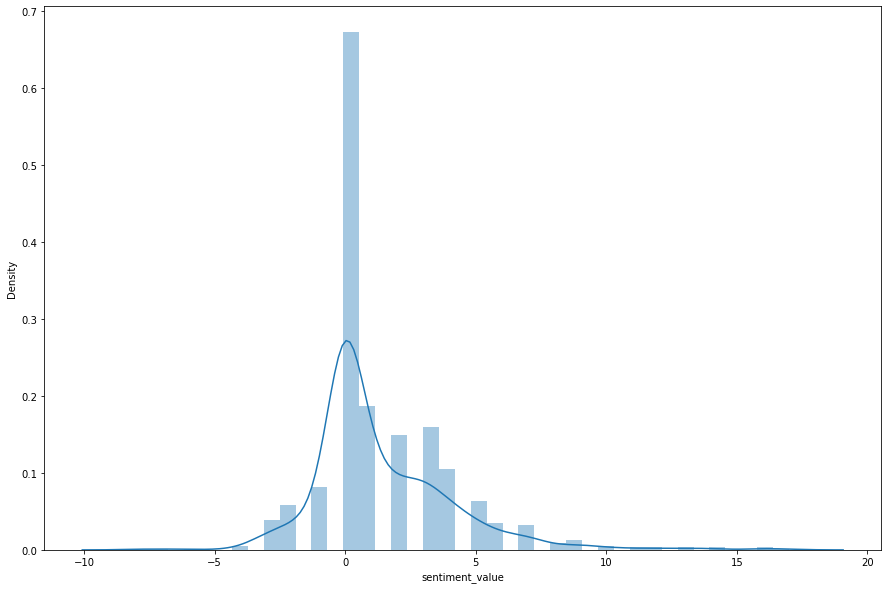

In [49]:
#Density plot
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value']);

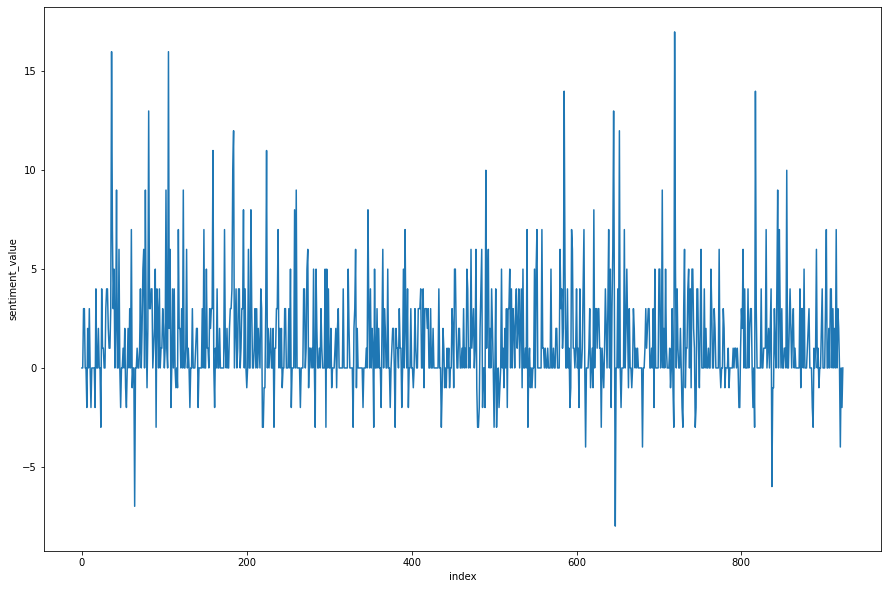

In [50]:
#line plot
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);